In [ ]:
# !git clone https://github.com/Jsrsky/machine_unlearning_experiments

## Dependencies

In [2]:
import os
import sys
import json
from torchvision import datasets

## Utils

In [ ]:
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../../"))
if project_root not in sys.path:
    sys.path.append(project_root)
    
data_root = os.path.join(project_root, 'data')
os.makedirs(data_root, exist_ok=True)

from notebook_setup import setup_notebook
setup_notebook()

Notebook setup completed. Project root added to sys.path: d:\Machine_unlearning_masters


In [4]:
# Device configuration
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

# Set random seed for reproducibility
from utils.utils import set_seed
set_seed()

# Init model
from models.simple_cnn import init_model_cnn

# Create sisa structure
from methods.sisa.sisa_utils import create_sisa_structure

# Recreate sisa dataloaders from json file
from methods.sisa.sisa_utils import recreate_sisa_dataloaders

# SISA train & test loop
from methods.sisa.sisa_train_test import sisa_train, sisa_test, retrain_sisa_framework

# Aggregate SISA models, via weighted voting
from methods.sisa.sisa_utils import evaluate_aggregated_model, update_sisa_structure



Device used: cpu


## Parameters (arbitrary chosen)

In [ ]:
BATCH_SIZE = 32

LEARNING_RATE = 0.001

EPOCHS = 5

SHARDS = 3

SLICES = 5

# SISA structure

## Get data transform

In [6]:
*_, transform = init_model_cnn()
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

Init model...
Done initializing model.
Model ID: 2323518743680, Optimizer ID: 2323499302064, Criterion ID: 2323485834608


## Load dataset

In [ ]:
dataset = datasets.MNIST(root=data_root, train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root=data_root, train=False, transform=transform, download=True)

## Create SISA structure

In [9]:
create_sisa_structure(dataset, shards=SHARDS, slices_per_shard=SLICES)

SISA structure saved to sisa_structure.json


In [10]:
sisa_structure_file = 'sisa_structure.json'

## Prepare DataLoaders from json file

In [11]:
dataloaders = recreate_sisa_dataloaders(
    datasets=(dataset, test_dataset),
    info_file_path=sisa_structure_file,
    batch_size=BATCH_SIZE,
    val_ratio=0.1
)

# Train using SISA framework

## Models output path

In [12]:
save_models_metrics_dir = './sisa_models'

## Call train

In [13]:
sisa_train(
    dataloaders=dataloaders, 
    num_epochs=EPOCHS, 
    save_models_metrics_dir=save_models_metrics_dir, 
    init_model_func=init_model_cnn,
    learning_rate=LEARNING_RATE,
    )


Training shard: shard_0
Init model...
Done initializing model.
Model ID: 2323519106144, Optimizer ID: 2323489620240, Criterion ID: 2323494779840
  Training slice: slice_0


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 55.55it/s]


Epoch [1/5], Train Loss: 0.8513, Train Accuracy: 0.7297, Val Loss: 0.2988, Val Accuracy: 0.9225
Epoch 1: New best validation accuracy: 0.9225. Model saved to ./sisa_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 59.09it/s]


Epoch [2/5], Train Loss: 0.1948, Train Accuracy: 0.9439, Val Loss: 0.2252, Val Accuracy: 0.9300
Epoch 2: New best validation accuracy: 0.9300. Model saved to ./sisa_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 60.49it/s]


Epoch [3/5], Train Loss: 0.1165, Train Accuracy: 0.9678, Val Loss: 0.1362, Val Accuracy: 0.9675
Epoch 3: New best validation accuracy: 0.9675. Model saved to ./sisa_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 50.73it/s]


Epoch [4/5], Train Loss: 0.0690, Train Accuracy: 0.9789, Val Loss: 0.1312, Val Accuracy: 0.9675


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 62.10it/s]


Epoch [5/5], Train Loss: 0.0504, Train Accuracy: 0.9836, Val Loss: 0.1102, Val Accuracy: 0.9650
Training complete for ./sisa_models/shard_0_slice_0_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_0_CNN_MNIST_history.json'.
  Training slice: slice_1


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 60.75it/s]


Epoch [1/5], Train Loss: 0.1208, Train Accuracy: 0.9631, Val Loss: 0.0728, Val Accuracy: 0.9675
Epoch 1: New best validation accuracy: 0.9675. Model saved to ./sisa_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 60.10it/s]


Epoch [2/5], Train Loss: 0.0612, Train Accuracy: 0.9811, Val Loss: 0.0641, Val Accuracy: 0.9800
Epoch 2: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 58.82it/s]


Epoch [3/5], Train Loss: 0.0393, Train Accuracy: 0.9878, Val Loss: 0.0711, Val Accuracy: 0.9750


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 60.46it/s]


Epoch [4/5], Train Loss: 0.0244, Train Accuracy: 0.9914, Val Loss: 0.0661, Val Accuracy: 0.9775


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 61.39it/s]


Epoch [5/5], Train Loss: 0.0111, Train Accuracy: 0.9975, Val Loss: 0.0706, Val Accuracy: 0.9700
Training complete for ./sisa_models/shard_0_slice_1_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_1_CNN_MNIST_history.json'.
  Training slice: slice_2


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 53.29it/s]


Epoch [1/5], Train Loss: 0.1083, Train Accuracy: 0.9681, Val Loss: 0.0849, Val Accuracy: 0.9850
Epoch 1: New best validation accuracy: 0.9850. Model saved to ./sisa_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 60.75it/s]


Epoch [2/5], Train Loss: 0.0429, Train Accuracy: 0.9869, Val Loss: 0.1171, Val Accuracy: 0.9650


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 52.00it/s]


Epoch [3/5], Train Loss: 0.0234, Train Accuracy: 0.9936, Val Loss: 0.0928, Val Accuracy: 0.9775


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 60.76it/s]


Epoch [4/5], Train Loss: 0.0088, Train Accuracy: 0.9975, Val Loss: 0.1005, Val Accuracy: 0.9775


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 62.27it/s]


Epoch [5/5], Train Loss: 0.0090, Train Accuracy: 0.9967, Val Loss: 0.0869, Val Accuracy: 0.9800
Training complete for ./sisa_models/shard_0_slice_2_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_2_CNN_MNIST_history.json'.
  Training slice: slice_3


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 47.80it/s]


Epoch [1/5], Train Loss: 0.0743, Train Accuracy: 0.9764, Val Loss: 0.0736, Val Accuracy: 0.9725
Epoch 1: New best validation accuracy: 0.9725. Model saved to ./sisa_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 59.91it/s]


Epoch [2/5], Train Loss: 0.0272, Train Accuracy: 0.9908, Val Loss: 0.0407, Val Accuracy: 0.9825
Epoch 2: New best validation accuracy: 0.9825. Model saved to ./sisa_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 58.56it/s]


Epoch [3/5], Train Loss: 0.0147, Train Accuracy: 0.9953, Val Loss: 0.0552, Val Accuracy: 0.9850
Epoch 3: New best validation accuracy: 0.9850. Model saved to ./sisa_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 37.71it/s]


Epoch [4/5], Train Loss: 0.0051, Train Accuracy: 0.9989, Val Loss: 0.0294, Val Accuracy: 0.9875
Epoch 4: New best validation accuracy: 0.9875. Model saved to ./sisa_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 64.04it/s]


Epoch [5/5], Train Loss: 0.0011, Train Accuracy: 1.0000, Val Loss: 0.0365, Val Accuracy: 0.9875
Training complete for ./sisa_models/shard_0_slice_3_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_3_CNN_MNIST_history.json'.
  Training slice: slice_4


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 64.05it/s]


Epoch [1/5], Train Loss: 0.0855, Train Accuracy: 0.9747, Val Loss: 0.0552, Val Accuracy: 0.9875
Epoch 1: New best validation accuracy: 0.9875. Model saved to ./sisa_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 47.42it/s]


Epoch [2/5], Train Loss: 0.0331, Train Accuracy: 0.9886, Val Loss: 0.0405, Val Accuracy: 0.9900
Epoch 2: New best validation accuracy: 0.9900. Model saved to ./sisa_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 55.08it/s]


Epoch [3/5], Train Loss: 0.0124, Train Accuracy: 0.9967, Val Loss: 0.0763, Val Accuracy: 0.9825


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 52.00it/s]


Epoch [4/5], Train Loss: 0.0056, Train Accuracy: 0.9989, Val Loss: 0.0734, Val Accuracy: 0.9850


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 62.20it/s]


Epoch [5/5], Train Loss: 0.0032, Train Accuracy: 0.9994, Val Loss: 0.0600, Val Accuracy: 0.9850
Training complete for ./sisa_models/shard_0_slice_4_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_4_CNN_MNIST_history.json'.
Saved final shard model to ./sisa_models/shard_0_final_model.pth
Training shard: shard_1
Init model...
Done initializing model.
Model ID: 2323519640624, Optimizer ID: 2323520109504, Criterion ID: 2323520230736
  Training slice: slice_0


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 59.89it/s]


Epoch [1/5], Train Loss: 0.7454, Train Accuracy: 0.7583, Val Loss: 0.2644, Val Accuracy: 0.9050
Epoch 1: New best validation accuracy: 0.9050. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 50.19it/s]


Epoch [2/5], Train Loss: 0.1691, Train Accuracy: 0.9478, Val Loss: 0.1671, Val Accuracy: 0.9425
Epoch 2: New best validation accuracy: 0.9425. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 32.97it/s]


Epoch [3/5], Train Loss: 0.1182, Train Accuracy: 0.9661, Val Loss: 0.1334, Val Accuracy: 0.9475
Epoch 3: New best validation accuracy: 0.9475. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 49.54it/s]


Epoch [4/5], Train Loss: 0.0795, Train Accuracy: 0.9781, Val Loss: 0.1085, Val Accuracy: 0.9575
Epoch 4: New best validation accuracy: 0.9575. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 58.03it/s]


Epoch [5/5], Train Loss: 0.0534, Train Accuracy: 0.9847, Val Loss: 0.1144, Val Accuracy: 0.9625
Epoch 5: New best validation accuracy: 0.9625. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.
Training complete for ./sisa_models/shard_1_slice_0_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_0_CNN_MNIST_history.json'.
  Training slice: slice_1


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 41.67it/s]


Epoch [1/5], Train Loss: 0.0979, Train Accuracy: 0.9700, Val Loss: 0.1100, Val Accuracy: 0.9625
Epoch 1: New best validation accuracy: 0.9625. Model saved to ./sisa_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 64.35it/s]


Epoch [2/5], Train Loss: 0.0459, Train Accuracy: 0.9864, Val Loss: 0.1247, Val Accuracy: 0.9550


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 65.59it/s]


Epoch [3/5], Train Loss: 0.0300, Train Accuracy: 0.9906, Val Loss: 0.1186, Val Accuracy: 0.9550


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 36.72it/s]


Epoch [4/5], Train Loss: 0.0166, Train Accuracy: 0.9961, Val Loss: 0.1391, Val Accuracy: 0.9675
Epoch 4: New best validation accuracy: 0.9675. Model saved to ./sisa_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 57.02it/s]


Epoch [5/5], Train Loss: 0.0131, Train Accuracy: 0.9969, Val Loss: 0.1282, Val Accuracy: 0.9650
Training complete for ./sisa_models/shard_1_slice_1_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_1_CNN_MNIST_history.json'.
  Training slice: slice_2


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 59.36it/s]


Epoch [1/5], Train Loss: 0.0840, Train Accuracy: 0.9719, Val Loss: 0.1087, Val Accuracy: 0.9750
Epoch 1: New best validation accuracy: 0.9750. Model saved to ./sisa_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 44.52it/s]


Epoch [2/5], Train Loss: 0.0396, Train Accuracy: 0.9869, Val Loss: 0.1271, Val Accuracy: 0.9625


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 57.74it/s]


Epoch [3/5], Train Loss: 0.0157, Train Accuracy: 0.9964, Val Loss: 0.0776, Val Accuracy: 0.9725


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 47.04it/s]


Epoch [4/5], Train Loss: 0.0074, Train Accuracy: 0.9978, Val Loss: 0.0764, Val Accuracy: 0.9750


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 58.29it/s]


Epoch [5/5], Train Loss: 0.0025, Train Accuracy: 0.9997, Val Loss: 0.0819, Val Accuracy: 0.9725
Training complete for ./sisa_models/shard_1_slice_2_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_2_CNN_MNIST_history.json'.
  Training slice: slice_3


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 59.63it/s]


Epoch [1/5], Train Loss: 0.0977, Train Accuracy: 0.9706, Val Loss: 0.0526, Val Accuracy: 0.9775
Epoch 1: New best validation accuracy: 0.9775. Model saved to ./sisa_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 59.09it/s]


Epoch [2/5], Train Loss: 0.0303, Train Accuracy: 0.9911, Val Loss: 0.0389, Val Accuracy: 0.9850
Epoch 2: New best validation accuracy: 0.9850. Model saved to ./sisa_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 61.91it/s]


Epoch [3/5], Train Loss: 0.0083, Train Accuracy: 0.9981, Val Loss: 0.0408, Val Accuracy: 0.9825


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 61.61it/s]


Epoch [4/5], Train Loss: 0.0071, Train Accuracy: 0.9978, Val Loss: 0.0437, Val Accuracy: 0.9850


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 62.50it/s]


Epoch [5/5], Train Loss: 0.0023, Train Accuracy: 0.9997, Val Loss: 0.0406, Val Accuracy: 0.9875
Epoch 5: New best validation accuracy: 0.9875. Model saved to ./sisa_models/shard_1_slice_3_CNN_MNIST_model.pth.
Training complete for ./sisa_models/shard_1_slice_3_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_3_CNN_MNIST_history.json'.
  Training slice: slice_4


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 57.83it/s]


Epoch [1/5], Train Loss: 0.0915, Train Accuracy: 0.9747, Val Loss: 0.1153, Val Accuracy: 0.9750
Epoch 1: New best validation accuracy: 0.9750. Model saved to ./sisa_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 57.57it/s]


Epoch [2/5], Train Loss: 0.0298, Train Accuracy: 0.9903, Val Loss: 0.1053, Val Accuracy: 0.9800
Epoch 2: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 56.17it/s]


Epoch [3/5], Train Loss: 0.0167, Train Accuracy: 0.9942, Val Loss: 0.1154, Val Accuracy: 0.9800


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 58.29it/s]


Epoch [4/5], Train Loss: 0.0051, Train Accuracy: 0.9986, Val Loss: 0.1148, Val Accuracy: 0.9825
Epoch 4: New best validation accuracy: 0.9825. Model saved to ./sisa_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 55.79it/s]


Epoch [5/5], Train Loss: 0.0015, Train Accuracy: 1.0000, Val Loss: 0.1180, Val Accuracy: 0.9825
Training complete for ./sisa_models/shard_1_slice_4_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_4_CNN_MNIST_history.json'.
Saved final shard model to ./sisa_models/shard_1_final_model.pth
Training shard: shard_2
Init model...
Done initializing model.
Model ID: 2323496801376, Optimizer ID: 2323494779840, Criterion ID: 2323520231360
  Training slice: slice_0


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 57.02it/s]


Epoch [1/5], Train Loss: 0.7852, Train Accuracy: 0.7503, Val Loss: 0.2639, Val Accuracy: 0.9300
Epoch 1: New best validation accuracy: 0.9300. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 37.36it/s]


Epoch [2/5], Train Loss: 0.1858, Train Accuracy: 0.9450, Val Loss: 0.1972, Val Accuracy: 0.9400
Epoch 2: New best validation accuracy: 0.9400. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 46.76it/s]


Epoch [3/5], Train Loss: 0.1156, Train Accuracy: 0.9667, Val Loss: 0.1577, Val Accuracy: 0.9450
Epoch 3: New best validation accuracy: 0.9450. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 61.32it/s]


Epoch [4/5], Train Loss: 0.0765, Train Accuracy: 0.9778, Val Loss: 0.1353, Val Accuracy: 0.9525
Epoch 4: New best validation accuracy: 0.9525. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 58.88it/s]


Epoch [5/5], Train Loss: 0.0521, Train Accuracy: 0.9847, Val Loss: 0.1138, Val Accuracy: 0.9675
Epoch 5: New best validation accuracy: 0.9675. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.
Training complete for ./sisa_models/shard_2_slice_0_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_0_CNN_MNIST_history.json'.
  Training slice: slice_1


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 61.91it/s]


Epoch [1/5], Train Loss: 0.1265, Train Accuracy: 0.9614, Val Loss: 0.1489, Val Accuracy: 0.9475
Epoch 1: New best validation accuracy: 0.9475. Model saved to ./sisa_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 47.22it/s]


Epoch [2/5], Train Loss: 0.0681, Train Accuracy: 0.9783, Val Loss: 0.1204, Val Accuracy: 0.9625
Epoch 2: New best validation accuracy: 0.9625. Model saved to ./sisa_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 48.02it/s]


Epoch [3/5], Train Loss: 0.0390, Train Accuracy: 0.9858, Val Loss: 0.1215, Val Accuracy: 0.9600


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 60.46it/s]


Epoch [4/5], Train Loss: 0.0220, Train Accuracy: 0.9936, Val Loss: 0.1575, Val Accuracy: 0.9675
Epoch 4: New best validation accuracy: 0.9675. Model saved to ./sisa_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 60.17it/s]


Epoch [5/5], Train Loss: 0.0146, Train Accuracy: 0.9964, Val Loss: 0.1494, Val Accuracy: 0.9675
Training complete for ./sisa_models/shard_2_slice_1_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_1_CNN_MNIST_history.json'.
  Training slice: slice_2


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 58.29it/s]


Epoch [1/5], Train Loss: 0.0930, Train Accuracy: 0.9739, Val Loss: 0.1065, Val Accuracy: 0.9650
Epoch 1: New best validation accuracy: 0.9650. Model saved to ./sisa_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 59.81it/s]


Epoch [2/5], Train Loss: 0.0453, Train Accuracy: 0.9878, Val Loss: 0.0979, Val Accuracy: 0.9650


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 59.63it/s]


Epoch [3/5], Train Loss: 0.0173, Train Accuracy: 0.9936, Val Loss: 0.0883, Val Accuracy: 0.9725
Epoch 3: New best validation accuracy: 0.9725. Model saved to ./sisa_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 58.03it/s]


Epoch [4/5], Train Loss: 0.0098, Train Accuracy: 0.9975, Val Loss: 0.0708, Val Accuracy: 0.9775
Epoch 4: New best validation accuracy: 0.9775. Model saved to ./sisa_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 57.52it/s]


Epoch [5/5], Train Loss: 0.0031, Train Accuracy: 1.0000, Val Loss: 0.0792, Val Accuracy: 0.9750
Training complete for ./sisa_models/shard_2_slice_2_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_2_CNN_MNIST_history.json'.
  Training slice: slice_3


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 56.28it/s]


Epoch [1/5], Train Loss: 0.0928, Train Accuracy: 0.9728, Val Loss: 0.0745, Val Accuracy: 0.9650
Epoch 1: New best validation accuracy: 0.9650. Model saved to ./sisa_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 52.42it/s]


Epoch [2/5], Train Loss: 0.0319, Train Accuracy: 0.9886, Val Loss: 0.0628, Val Accuracy: 0.9800
Epoch 2: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 51.59it/s]


Epoch [3/5], Train Loss: 0.0163, Train Accuracy: 0.9944, Val Loss: 0.0771, Val Accuracy: 0.9750


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 40.50it/s]


Epoch [4/5], Train Loss: 0.0097, Train Accuracy: 0.9972, Val Loss: 0.0627, Val Accuracy: 0.9775


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 53.94it/s]


Epoch [5/5], Train Loss: 0.0075, Train Accuracy: 0.9978, Val Loss: 0.0630, Val Accuracy: 0.9800
Training complete for ./sisa_models/shard_2_slice_3_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_3_CNN_MNIST_history.json'.
  Training slice: slice_4


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 52.17it/s]


Epoch [1/5], Train Loss: 0.0726, Train Accuracy: 0.9783, Val Loss: 0.1007, Val Accuracy: 0.9575
Epoch 1: New best validation accuracy: 0.9575. Model saved to ./sisa_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 54.05it/s]


Epoch [2/5], Train Loss: 0.0175, Train Accuracy: 0.9944, Val Loss: 0.0470, Val Accuracy: 0.9875
Epoch 2: New best validation accuracy: 0.9875. Model saved to ./sisa_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 61.32it/s]


Epoch [3/5], Train Loss: 0.0116, Train Accuracy: 0.9961, Val Loss: 0.0582, Val Accuracy: 0.9800


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 56.28it/s]


Epoch [4/5], Train Loss: 0.0040, Train Accuracy: 0.9992, Val Loss: 0.0588, Val Accuracy: 0.9825


Evaluating on validation set...): 100%|██████████| 13/13 [00:00<00:00, 54.56it/s]

Epoch [5/5], Train Loss: 0.0012, Train Accuracy: 1.0000, Val Loss: 0.0506, Val Accuracy: 0.9900
Epoch 5: New best validation accuracy: 0.9900. Model saved to ./sisa_models/shard_2_slice_4_CNN_MNIST_model.pth.
Training complete for ./sisa_models/shard_2_slice_4_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_4_CNN_MNIST_history.json'.
Saved final shard model to ./sisa_models/shard_2_final_model.pth


## Call test

In [14]:
sisa_test(
    dataloaders=dataloaders, 
    saved_models_metrics_dir=save_models_metrics_dir, 
    init_model_func=init_model_cnn,
    clear_solo_models_preds=True)

Init model...
Done initializing model.
Model ID: 2323520105328, Optimizer ID: 2323494779840, Criterion ID: 2323440636832
Loading and testing model: ./sisa_models/shard_0_CNN_MNIST


Evaluating model: ./sisa_models/shard_0_final_model.pth: 100%|██████████| 313/313 [00:06<00:00, 51.29it/s]


Predictions and labels saved to ./sisa_models/shard_0_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 2323519637312, Optimizer ID: 2323520241200, Criterion ID: 2323520241248
Loading and testing model: ./sisa_models/shard_1_CNN_MNIST


Evaluating model: ./sisa_models/shard_1_final_model.pth: 100%|██████████| 313/313 [00:06<00:00, 50.46it/s]


Predictions and labels saved to ./sisa_models/shard_1_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 2323488565696, Optimizer ID: 2323520231648, Criterion ID: 2323522045472
Loading and testing model: ./sisa_models/shard_2_CNN_MNIST


Evaluating model: ./sisa_models/shard_2_final_model.pth: 100%|██████████| 313/313 [00:05<00:00, 54.73it/s]


Predictions and labels saved to ./sisa_models/shard_2_CNN_MNIST_predictions.json
Evaluation results saved to sisa_final_evaluation.json


## Shard models assembly (weighted voting, w=accuracy)

In [15]:
with open("sisa_final_evaluation.json", "r") as f:
    results = json.load(f)

Shard shard_0 Metrics:
  Accuracy: 0.9851
  Precision: 0.9852
  Recall: 0.9851
  F1 Score: 0.9851
Shard shard_1 Metrics:
  Accuracy: 0.9872
  Precision: 0.9872
  Recall: 0.9872
  F1 Score: 0.9872
Shard shard_2 Metrics:
  Accuracy: 0.9858
  Precision: 0.9858
  Recall: 0.9858
  F1 Score: 0.9858

Aggregated Model Metrics:
  Accuracy: 0.9885
  Precision: 0.9885
  Recall: 0.9885
  F1 Score: 0.9885


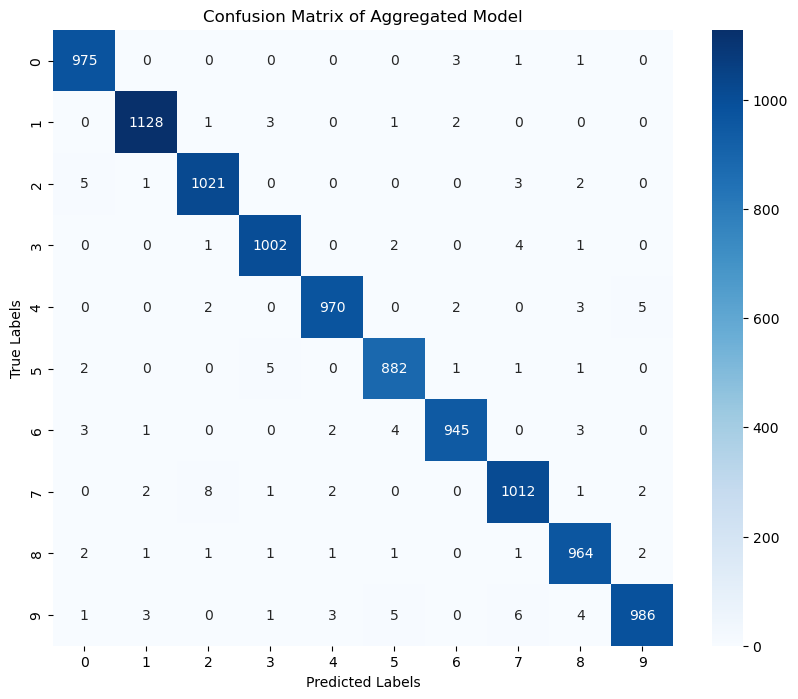

In [16]:
evaluate_aggregated_model(results)

# SISA re-train

## Paths to data info

In [ ]:
mnist_samples_to_delete = 'mnist_samples_to_unlearn.json'
mnist_sisa_structure = 'sisa_structure.json'
updated_sisa_structure = 'updated_sisa_strucute.json'
deleted_samples = 'deleted_samples.json'

## Update sisa structure -> delete samples 

In [ ]:
affected_shards = update_sisa_structure(mnist_samples_to_delete, mnist_sisa_structure, updated_sisa_structure,deleted_samples)

Retraining Plan:
  Shard: shard_0, Start from Slice: slice_0 onward
  Shard: shard_1, Start from Slice: slice_0 onward
  Shard: shard_2, Start from Slice: slice_0 onward


## Recreate DataLoaders from json file

In [ ]:
dataloaders = recreate_sisa_dataloaders(
    datasets=(dataset, test_dataset),
    info_file_path=updated_sisa_structure,
    batch_size=BATCH_SIZE,
    val_ratio=0.1
)

## Models output path

In [ ]:
save_path = "./sisa_updated_models"

## Retrain the affected shards

In [18]:
retrain_sisa_framework(
    dataloaders=dataloaders,
    affected_shards=affected_shards,
    num_epochs=EPOCHS,
    save_models_metrics_dir=save_path,
    init_model_func=init_model_cnn, 
    learning_rate=LEARNING_RATE
)

Retraining shard: shard_0
Init model...
Done initializing model.
Model ID: 2323440634480, Optimizer ID: 2323519271568, Criterion ID: 2323519272000
  Retraining slice: slice_0


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 36.97it/s]


Epoch [1/5], Train Loss: 0.8494, Train Accuracy: 0.7392, Val Loss: 0.3068, Val Accuracy: 0.9086
Epoch 1: New best validation accuracy: 0.9086. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 59.11it/s]


Epoch [2/5], Train Loss: 0.2160, Train Accuracy: 0.9385, Val Loss: 0.1578, Val Accuracy: 0.9640
Epoch 2: New best validation accuracy: 0.9640. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 61.22it/s]


Epoch [3/5], Train Loss: 0.1220, Train Accuracy: 0.9637, Val Loss: 0.1498, Val Accuracy: 0.9557


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 62.00it/s]


Epoch [4/5], Train Loss: 0.0748, Train Accuracy: 0.9785, Val Loss: 0.1579, Val Accuracy: 0.9529


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 53.78it/s]


Epoch [5/5], Train Loss: 0.0484, Train Accuracy: 0.9862, Val Loss: 0.1334, Val Accuracy: 0.9668
Epoch 5: New best validation accuracy: 0.9668. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.
Training complete for ./sisa_updated_models/shard_0_slice_0_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_0_CNN_MNIST_history.json'.
  Retraining slice: slice_1


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 59.41it/s]


Epoch [1/5], Train Loss: 0.1247, Train Accuracy: 0.9609, Val Loss: 0.1070, Val Accuracy: 0.9639
Epoch 1: New best validation accuracy: 0.9639. Model saved to ./sisa_updated_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 66.30it/s]


Epoch [2/5], Train Loss: 0.0603, Train Accuracy: 0.9806, Val Loss: 0.0709, Val Accuracy: 0.9722
Epoch 2: New best validation accuracy: 0.9722. Model saved to ./sisa_updated_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 61.46it/s]


Epoch [3/5], Train Loss: 0.0374, Train Accuracy: 0.9895, Val Loss: 0.1030, Val Accuracy: 0.9639


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 57.69it/s]


Epoch [4/5], Train Loss: 0.0274, Train Accuracy: 0.9914, Val Loss: 0.0900, Val Accuracy: 0.9778
Epoch 4: New best validation accuracy: 0.9778. Model saved to ./sisa_updated_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 52.56it/s]


Epoch [5/5], Train Loss: 0.0152, Train Accuracy: 0.9954, Val Loss: 0.0931, Val Accuracy: 0.9778
Training complete for ./sisa_updated_models/shard_0_slice_1_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_1_CNN_MNIST_history.json'.
  Retraining slice: slice_2


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 61.86it/s]


Epoch [1/5], Train Loss: 0.1079, Train Accuracy: 0.9672, Val Loss: 0.1354, Val Accuracy: 0.9690
Epoch 1: New best validation accuracy: 0.9690. Model saved to ./sisa_updated_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 56.34it/s]


Epoch [2/5], Train Loss: 0.0490, Train Accuracy: 0.9844, Val Loss: 0.1035, Val Accuracy: 0.9634


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 52.85it/s]


Epoch [3/5], Train Loss: 0.0240, Train Accuracy: 0.9934, Val Loss: 0.1216, Val Accuracy: 0.9662


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 50.32it/s]


Epoch [4/5], Train Loss: 0.0104, Train Accuracy: 0.9972, Val Loss: 0.1099, Val Accuracy: 0.9718
Epoch 4: New best validation accuracy: 0.9718. Model saved to ./sisa_updated_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 63.16it/s]


Epoch [5/5], Train Loss: 0.0036, Train Accuracy: 0.9997, Val Loss: 0.1335, Val Accuracy: 0.9662
Training complete for ./sisa_updated_models/shard_0_slice_2_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_2_CNN_MNIST_history.json'.
  Retraining slice: slice_3


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 38.71it/s]


Epoch [1/5], Train Loss: 0.0759, Train Accuracy: 0.9761, Val Loss: 0.0783, Val Accuracy: 0.9751
Epoch 1: New best validation accuracy: 0.9751. Model saved to ./sisa_updated_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 48.19it/s]


Epoch [2/5], Train Loss: 0.0426, Train Accuracy: 0.9840, Val Loss: 0.0618, Val Accuracy: 0.9779
Epoch 2: New best validation accuracy: 0.9779. Model saved to ./sisa_updated_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 52.14it/s]


Epoch [3/5], Train Loss: 0.0119, Train Accuracy: 0.9972, Val Loss: 0.0435, Val Accuracy: 0.9834
Epoch 3: New best validation accuracy: 0.9834. Model saved to ./sisa_updated_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 52.40it/s]


Epoch [4/5], Train Loss: 0.0066, Train Accuracy: 0.9988, Val Loss: 0.0297, Val Accuracy: 0.9862
Epoch 4: New best validation accuracy: 0.9862. Model saved to ./sisa_updated_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 63.16it/s]


Epoch [5/5], Train Loss: 0.0014, Train Accuracy: 1.0000, Val Loss: 0.0306, Val Accuracy: 0.9890
Epoch 5: New best validation accuracy: 0.9890. Model saved to ./sisa_updated_models/shard_0_slice_3_CNN_MNIST_model.pth.
Training complete for ./sisa_updated_models/shard_0_slice_3_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_3_CNN_MNIST_history.json'.
  Retraining slice: slice_4


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 57.41it/s]


Epoch [1/5], Train Loss: 0.0791, Train Accuracy: 0.9770, Val Loss: 0.1182, Val Accuracy: 0.9558
Epoch 1: New best validation accuracy: 0.9558. Model saved to ./sisa_updated_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 51.85it/s]


Epoch [2/5], Train Loss: 0.0341, Train Accuracy: 0.9890, Val Loss: 0.0860, Val Accuracy: 0.9751
Epoch 2: New best validation accuracy: 0.9751. Model saved to ./sisa_updated_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 55.42it/s]


Epoch [3/5], Train Loss: 0.0136, Train Accuracy: 0.9963, Val Loss: 0.1096, Val Accuracy: 0.9779
Epoch 3: New best validation accuracy: 0.9779. Model saved to ./sisa_updated_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 54.30it/s]


Epoch [4/5], Train Loss: 0.0042, Train Accuracy: 0.9997, Val Loss: 0.1057, Val Accuracy: 0.9779


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 54.05it/s]


Epoch [5/5], Train Loss: 0.0099, Train Accuracy: 0.9972, Val Loss: 0.1262, Val Accuracy: 0.9724
Training complete for ./sisa_updated_models/shard_0_slice_4_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_4_CNN_MNIST_history.json'.
Saved updated model for shard_0 to ./sisa_updated_models/shard_0_final_model.pth
Retraining shard: shard_1
Init model...
Done initializing model.
Model ID: 2323525085344, Optimizer ID: 2323520103216, Criterion ID: 2323520101296
  Retraining slice: slice_0


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 51.28it/s]


Epoch [1/5], Train Loss: 0.8678, Train Accuracy: 0.7319, Val Loss: 0.2808, Val Accuracy: 0.9270
Epoch 1: New best validation accuracy: 0.9270. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 57.97it/s]


Epoch [2/5], Train Loss: 0.2259, Train Accuracy: 0.9309, Val Loss: 0.1524, Val Accuracy: 0.9579
Epoch 2: New best validation accuracy: 0.9579. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 61.22it/s]


Epoch [3/5], Train Loss: 0.1293, Train Accuracy: 0.9611, Val Loss: 0.1231, Val Accuracy: 0.9551


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 54.03it/s]


Epoch [4/5], Train Loss: 0.0992, Train Accuracy: 0.9701, Val Loss: 0.1146, Val Accuracy: 0.9663
Epoch 4: New best validation accuracy: 0.9663. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 46.09it/s]


Epoch [5/5], Train Loss: 0.0677, Train Accuracy: 0.9807, Val Loss: 0.0984, Val Accuracy: 0.9719
Epoch 5: New best validation accuracy: 0.9719. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.
Training complete for ./sisa_updated_models/shard_1_slice_0_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_0_CNN_MNIST_history.json'.
  Retraining slice: slice_1


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 57.97it/s]


Epoch [1/5], Train Loss: 0.1167, Train Accuracy: 0.9639, Val Loss: 0.1684, Val Accuracy: 0.9528
Epoch 1: New best validation accuracy: 0.9528. Model saved to ./sisa_updated_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 54.50it/s]


Epoch [2/5], Train Loss: 0.0787, Train Accuracy: 0.9732, Val Loss: 0.1375, Val Accuracy: 0.9583
Epoch 2: New best validation accuracy: 0.9583. Model saved to ./sisa_updated_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 62.50it/s]


Epoch [3/5], Train Loss: 0.0394, Train Accuracy: 0.9874, Val Loss: 0.0978, Val Accuracy: 0.9639
Epoch 3: New best validation accuracy: 0.9639. Model saved to ./sisa_updated_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 48.19it/s]


Epoch [4/5], Train Loss: 0.0189, Train Accuracy: 0.9951, Val Loss: 0.1112, Val Accuracy: 0.9639


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 54.55it/s]


Epoch [5/5], Train Loss: 0.0111, Train Accuracy: 0.9981, Val Loss: 0.1115, Val Accuracy: 0.9750
Epoch 5: New best validation accuracy: 0.9750. Model saved to ./sisa_updated_models/shard_1_slice_1_CNN_MNIST_model.pth.
Training complete for ./sisa_updated_models/shard_1_slice_1_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_1_CNN_MNIST_history.json'.
  Retraining slice: slice_2


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 60.01it/s]


Epoch [1/5], Train Loss: 0.1041, Train Accuracy: 0.9650, Val Loss: 0.0921, Val Accuracy: 0.9638
Epoch 1: New best validation accuracy: 0.9638. Model saved to ./sisa_updated_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 35.49it/s]


Epoch [2/5], Train Loss: 0.0452, Train Accuracy: 0.9870, Val Loss: 0.0377, Val Accuracy: 0.9861
Epoch 2: New best validation accuracy: 0.9861. Model saved to ./sisa_updated_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 62.50it/s]


Epoch [3/5], Train Loss: 0.0349, Train Accuracy: 0.9901, Val Loss: 0.0396, Val Accuracy: 0.9805


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 60.00it/s]


Epoch [4/5], Train Loss: 0.0094, Train Accuracy: 0.9981, Val Loss: 0.0376, Val Accuracy: 0.9889
Epoch 4: New best validation accuracy: 0.9889. Model saved to ./sisa_updated_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 52.17it/s]


Epoch [5/5], Train Loss: 0.0090, Train Accuracy: 0.9969, Val Loss: 0.0334, Val Accuracy: 0.9861
Training complete for ./sisa_updated_models/shard_1_slice_2_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_2_CNN_MNIST_history.json'.
  Retraining slice: slice_3


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 56.87it/s]


Epoch [1/5], Train Loss: 0.0838, Train Accuracy: 0.9736, Val Loss: 0.0756, Val Accuracy: 0.9751
Epoch 1: New best validation accuracy: 0.9751. Model saved to ./sisa_updated_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 55.30it/s]


Epoch [2/5], Train Loss: 0.0355, Train Accuracy: 0.9883, Val Loss: 0.1053, Val Accuracy: 0.9613


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 56.60it/s]


Epoch [3/5], Train Loss: 0.0123, Train Accuracy: 0.9975, Val Loss: 0.0862, Val Accuracy: 0.9724


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 36.20it/s]


Epoch [4/5], Train Loss: 0.0053, Train Accuracy: 0.9991, Val Loss: 0.0673, Val Accuracy: 0.9807
Epoch 4: New best validation accuracy: 0.9807. Model saved to ./sisa_updated_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 51.73it/s]


Epoch [5/5], Train Loss: 0.0024, Train Accuracy: 0.9997, Val Loss: 0.0572, Val Accuracy: 0.9807
Training complete for ./sisa_updated_models/shard_1_slice_3_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_3_CNN_MNIST_history.json'.
  Retraining slice: slice_4


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 52.66it/s]


Epoch [1/5], Train Loss: 0.1127, Train Accuracy: 0.9691, Val Loss: 0.1613, Val Accuracy: 0.9613
Epoch 1: New best validation accuracy: 0.9613. Model saved to ./sisa_updated_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 58.54it/s]


Epoch [2/5], Train Loss: 0.1198, Train Accuracy: 0.9675, Val Loss: 0.0807, Val Accuracy: 0.9669
Epoch 2: New best validation accuracy: 0.9669. Model saved to ./sisa_updated_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 55.05it/s]


Epoch [3/5], Train Loss: 0.0201, Train Accuracy: 0.9942, Val Loss: 0.1148, Val Accuracy: 0.9641


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 56.08it/s]


Epoch [4/5], Train Loss: 0.0147, Train Accuracy: 0.9957, Val Loss: 0.0922, Val Accuracy: 0.9724
Epoch 4: New best validation accuracy: 0.9724. Model saved to ./sisa_updated_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 59.11it/s]


Epoch [5/5], Train Loss: 0.0041, Train Accuracy: 0.9997, Val Loss: 0.0997, Val Accuracy: 0.9696
Training complete for ./sisa_updated_models/shard_1_slice_4_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_4_CNN_MNIST_history.json'.
Saved updated model for shard_1 to ./sisa_updated_models/shard_1_final_model.pth
Retraining shard: shard_2
Init model...
Done initializing model.
Model ID: 2323520235488, Optimizer ID: 2323520231648, Criterion ID: 2323520102256
  Retraining slice: slice_0


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 51.76it/s]


Epoch [1/5], Train Loss: 0.7807, Train Accuracy: 0.7523, Val Loss: 0.3374, Val Accuracy: 0.9048
Epoch 1: New best validation accuracy: 0.9048. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 60.60it/s]


Epoch [2/5], Train Loss: 0.1932, Train Accuracy: 0.9440, Val Loss: 0.1658, Val Accuracy: 0.9496
Epoch 2: New best validation accuracy: 0.9496. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 57.97it/s]


Epoch [3/5], Train Loss: 0.0976, Train Accuracy: 0.9708, Val Loss: 0.1451, Val Accuracy: 0.9580
Epoch 3: New best validation accuracy: 0.9580. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 58.09it/s]


Epoch [4/5], Train Loss: 0.0728, Train Accuracy: 0.9789, Val Loss: 0.1317, Val Accuracy: 0.9608
Epoch 4: New best validation accuracy: 0.9608. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 53.37it/s]


Epoch [5/5], Train Loss: 0.0509, Train Accuracy: 0.9860, Val Loss: 0.1225, Val Accuracy: 0.9580
Training complete for ./sisa_updated_models/shard_2_slice_0_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_0_CNN_MNIST_history.json'.
  Retraining slice: slice_1


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 59.11it/s]


Epoch [1/5], Train Loss: 0.1291, Train Accuracy: 0.9606, Val Loss: 0.0714, Val Accuracy: 0.9722
Epoch 1: New best validation accuracy: 0.9722. Model saved to ./sisa_updated_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 56.87it/s]


Epoch [2/5], Train Loss: 0.0662, Train Accuracy: 0.9803, Val Loss: 0.0997, Val Accuracy: 0.9722


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 34.99it/s]


Epoch [3/5], Train Loss: 0.0320, Train Accuracy: 0.9908, Val Loss: 0.0760, Val Accuracy: 0.9778
Epoch 3: New best validation accuracy: 0.9778. Model saved to ./sisa_updated_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 56.34it/s]


Epoch [4/5], Train Loss: 0.0163, Train Accuracy: 0.9954, Val Loss: 0.0686, Val Accuracy: 0.9778


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 47.06it/s]


Epoch [5/5], Train Loss: 0.0092, Train Accuracy: 0.9978, Val Loss: 0.0614, Val Accuracy: 0.9750
Training complete for ./sisa_updated_models/shard_2_slice_1_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_1_CNN_MNIST_history.json'.
  Retraining slice: slice_2


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 65.93it/s]


Epoch [1/5], Train Loss: 0.0940, Train Accuracy: 0.9688, Val Loss: 0.0885, Val Accuracy: 0.9666
Epoch 1: New best validation accuracy: 0.9666. Model saved to ./sisa_updated_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 46.26it/s]


Epoch [2/5], Train Loss: 0.0396, Train Accuracy: 0.9876, Val Loss: 0.0677, Val Accuracy: 0.9805
Epoch 2: New best validation accuracy: 0.9805. Model saved to ./sisa_updated_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 64.86it/s]


Epoch [3/5], Train Loss: 0.0174, Train Accuracy: 0.9938, Val Loss: 0.0609, Val Accuracy: 0.9805


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 58.80it/s]


Epoch [4/5], Train Loss: 0.0153, Train Accuracy: 0.9957, Val Loss: 0.0618, Val Accuracy: 0.9777


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 33.22it/s]


Epoch [5/5], Train Loss: 0.0063, Train Accuracy: 0.9985, Val Loss: 0.0482, Val Accuracy: 0.9833
Epoch 5: New best validation accuracy: 0.9833. Model saved to ./sisa_updated_models/shard_2_slice_2_CNN_MNIST_model.pth.
Training complete for ./sisa_updated_models/shard_2_slice_2_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_2_CNN_MNIST_history.json'.
  Retraining slice: slice_3


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 49.78it/s]


Epoch [1/5], Train Loss: 0.0886, Train Accuracy: 0.9752, Val Loss: 0.1220, Val Accuracy: 0.9721
Epoch 1: New best validation accuracy: 0.9721. Model saved to ./sisa_updated_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 25.92it/s]


Epoch [2/5], Train Loss: 0.0310, Train Accuracy: 0.9913, Val Loss: 0.1181, Val Accuracy: 0.9749
Epoch 2: New best validation accuracy: 0.9749. Model saved to ./sisa_updated_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 33.99it/s]


Epoch [3/5], Train Loss: 0.0102, Train Accuracy: 0.9972, Val Loss: 0.1315, Val Accuracy: 0.9665


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 40.81it/s]


Epoch [4/5], Train Loss: 0.0053, Train Accuracy: 0.9984, Val Loss: 0.1537, Val Accuracy: 0.9721


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 40.96it/s]


Epoch [5/5], Train Loss: 0.0041, Train Accuracy: 0.9994, Val Loss: 0.1579, Val Accuracy: 0.9749
Training complete for ./sisa_updated_models/shard_2_slice_3_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_3_CNN_MNIST_history.json'.
  Retraining slice: slice_4


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 41.91it/s]


Epoch [1/5], Train Loss: 0.0740, Train Accuracy: 0.9797, Val Loss: 0.0678, Val Accuracy: 0.9640
Epoch 1: New best validation accuracy: 0.9640. Model saved to ./sisa_updated_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 39.92it/s]


Epoch [2/5], Train Loss: 0.0250, Train Accuracy: 0.9920, Val Loss: 0.0644, Val Accuracy: 0.9834
Epoch 2: New best validation accuracy: 0.9834. Model saved to ./sisa_updated_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 42.59it/s]


Epoch [3/5], Train Loss: 0.0106, Train Accuracy: 0.9963, Val Loss: 0.0574, Val Accuracy: 0.9778


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 51.56it/s]


Epoch [4/5], Train Loss: 0.0027, Train Accuracy: 1.0000, Val Loss: 0.0498, Val Accuracy: 0.9806


Evaluating on validation set...): 100%|██████████| 12/12 [00:00<00:00, 32.27it/s]

Epoch [5/5], Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 0.0347, Val Accuracy: 0.9806
Training complete for ./sisa_updated_models/shard_2_slice_4_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_4_CNN_MNIST_history.json'.
Saved updated model for shard_2 to ./sisa_updated_models/shard_2_final_model.pth


## Re-test new SISA models

In [20]:
sisa_test(
    dataloaders=dataloaders, 
    saved_models_metrics_dir=save_path, 
    init_model_func=init_model_cnn,
    clear_solo_models_preds=True)

Init model...
Done initializing model.
Model ID: 2323499008128, Optimizer ID: 2323520102544, Criterion ID: 2323520104560
Loading and testing model: ./sisa_updated_models/shard_0_CNN_MNIST


Evaluating model: ./sisa_updated_models/shard_0_final_model.pth: 100%|██████████| 313/313 [00:05<00:00, 52.50it/s]


Predictions and labels saved to ./sisa_updated_models/shard_0_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 2323520238224, Optimizer ID: 2323520100912, Criterion ID: 2323520230160
Loading and testing model: ./sisa_updated_models/shard_1_CNN_MNIST


Evaluating model: ./sisa_updated_models/shard_1_final_model.pth: 100%|██████████| 313/313 [00:05<00:00, 56.44it/s]


Predictions and labels saved to ./sisa_updated_models/shard_1_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 2323520099616, Optimizer ID: 2323525203920, Criterion ID: 2323525198352
Loading and testing model: ./sisa_updated_models/shard_2_CNN_MNIST


Evaluating model: ./sisa_updated_models/shard_2_final_model.pth: 100%|██████████| 313/313 [00:05<00:00, 57.74it/s]

Predictions and labels saved to ./sisa_updated_models/shard_2_CNN_MNIST_predictions.json
Evaluation results saved to sisa_final_evaluation.json


## Shard models assembly (weighted voting, w=accuracy)

In [21]:
with open("sisa_final_evaluation.json", "r") as f:
    results = json.load(f)

Shard shard_0 Metrics:
  Accuracy: 0.9806
  Precision: 0.9808
  Recall: 0.9806
  F1 Score: 0.9806
Shard shard_1 Metrics:
  Accuracy: 0.9824
  Precision: 0.9825
  Recall: 0.9824
  F1 Score: 0.9824
Shard shard_2 Metrics:
  Accuracy: 0.9854
  Precision: 0.9854
  Recall: 0.9854
  F1 Score: 0.9854

Aggregated Model Metrics:
  Accuracy: 0.9873
  Precision: 0.9873
  Recall: 0.9873
  F1 Score: 0.9873


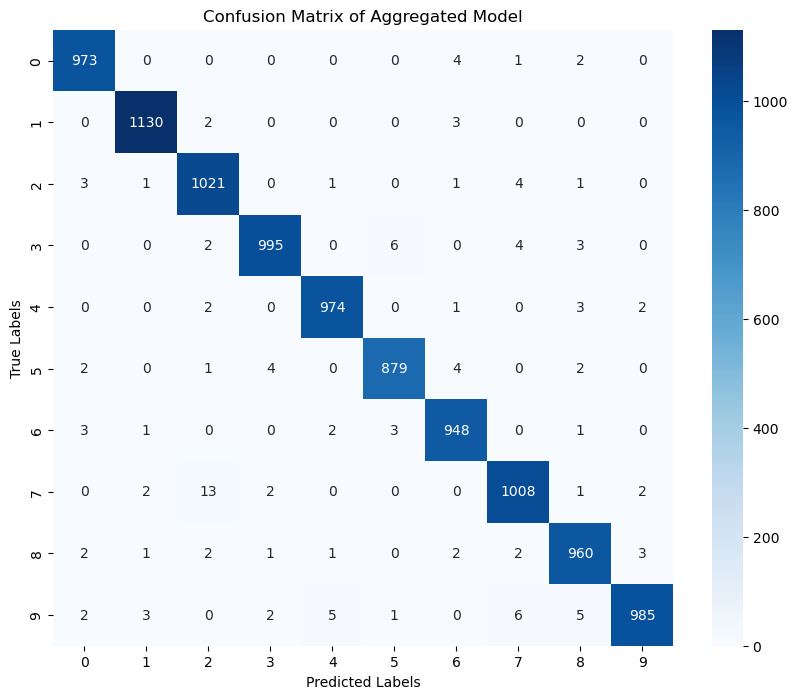

In [22]:
evaluate_aggregated_model(results)